In [4]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url,parse_dates=['Month'],index_col='Month')
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


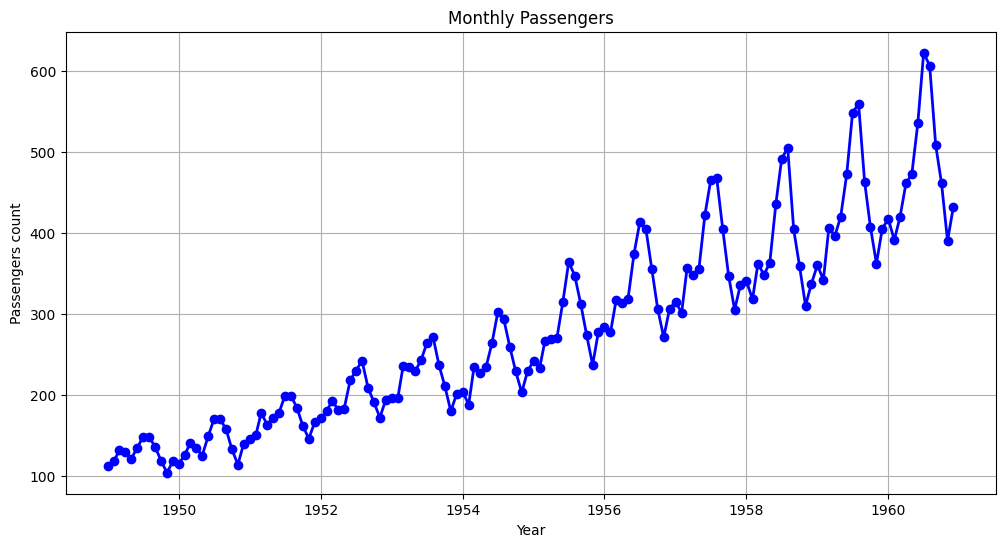

In [ ]:
#Creating a line plot
plt.figure(figsize=(12,6))
plt.plot(df, color='blue',marker='o',linestyle='-',linewidth=2,markersize=6)
plt.title('Monthly Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers count')
plt.grid(True)
plt.show()

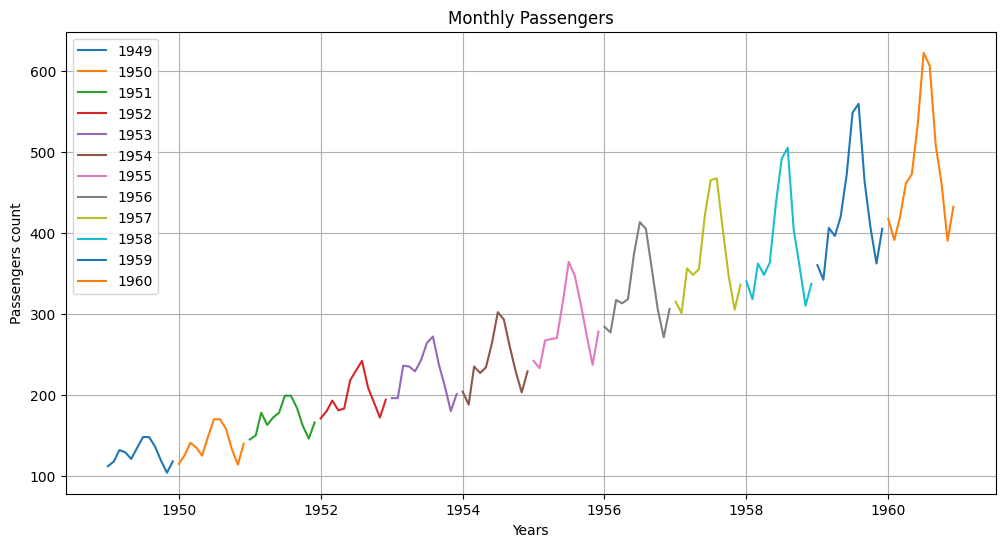

In [ ]:
#Extraxt years from data
years = df.index.year.unique()

#Plotting each year as its own line
plt.figure(figsize=(12,6))
for year in years:
  year_data = df[df.index.year == year]
  plt.plot(year_data['Passengers'],label=str(year))

plt.title('Monthly Passengers')
plt.xlabel('Years')
plt.ylabel('Passengers count')
plt.legend()
plt.grid(True)
plt.show()

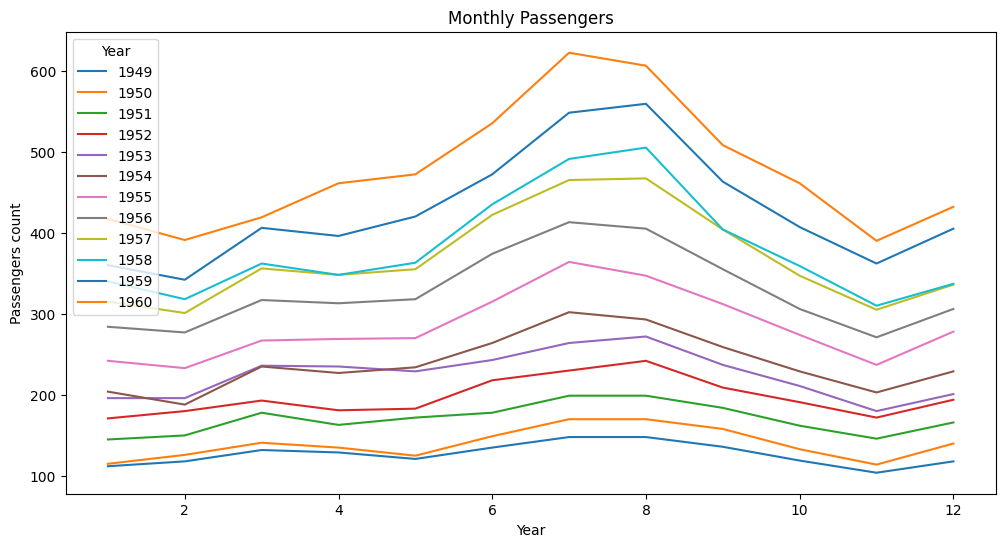

In [ ]:
#Plot seasonal subseries
df['Year'] = df.index.year
df['month'] = df.index.month

#Pivot table
table = pd.pivot_table(df, values='Passengers',index=['month'],columns='Year',aggfunc='sum')

#Plot the series
fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Year')
ax.set_ylabel('Passengers count')
ax.set_title('Monthly Passengers')
plt.show()

/tmp/ipython-input-796418366.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Passengers'], shade=True)


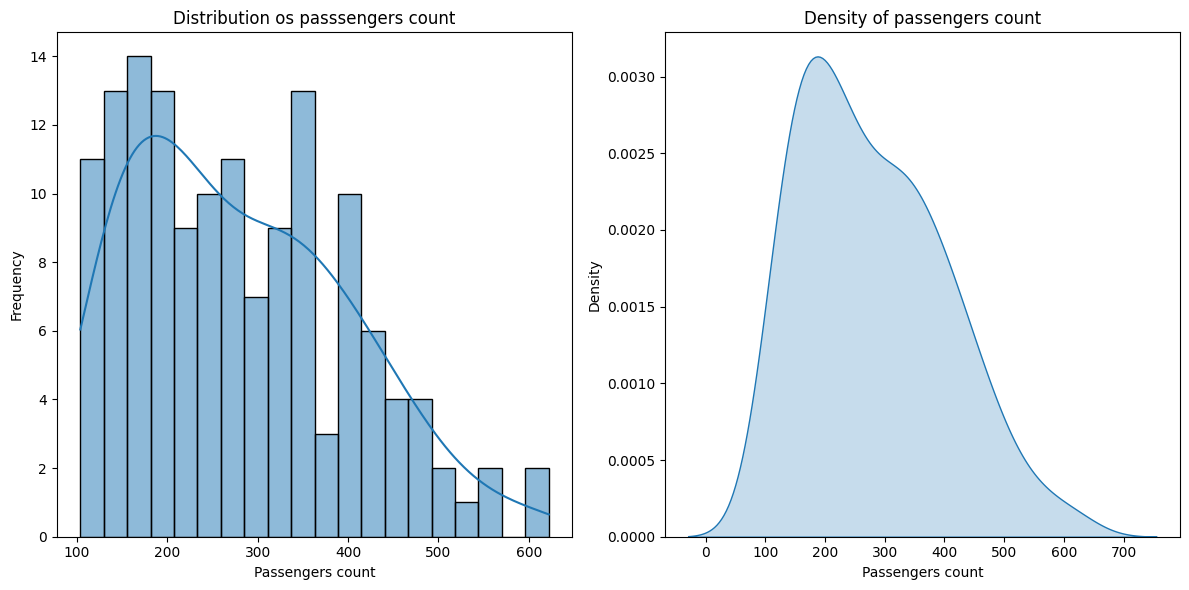

In [ ]:
import seaborn as sns

#Histogram
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['Passengers'], bins=20, kde=True)
plt.title('Distribution os passsengers count')
plt.xlabel('Passengers count')
plt.ylabel('Frequency')

#Density
plt.subplot(1,2,2)
sns.kdeplot(df['Passengers'], shade=True)
plt.title('Density of passengers count')
plt.xlabel('Passengers count')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Exercise 1: Use the Sunspots dataset (https://www.kaggle.com/datasets/robervalt/sunspots) to demonstrate basic concepts of time series

In [5]:
import zipfile
import os

# Extract the Sunspots.zip file
with zipfile.ZipFile('Sunspots.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# List the contents of the current directory to identify the extracted CSV file
!ls

sample_data  Sunspots.csv  Sunspots.zip


In [8]:
sunspots_df = pd.read_csv('Sunspots.csv', parse_dates=['Date'], index_col='Date')
sunspots_df.head(10)

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7
1749-06-30,5,139.2
1749-07-31,6,158.0
1749-08-31,7,110.5
1749-09-30,8,126.5


In [17]:
if 'Unnamed: 0' in sunspots_df.columns:
    sunspots_df = sunspots_df.drop(columns=['Unnamed: 0'])

colname = 'Monthly Mean Total Sunspot Number'
if colname in sunspots_df.columns:
    sunspots_df = sunspots_df.rename(columns={colname: 'Sunspots'})

if not isinstance(sunspots_df.index, pd.DatetimeIndex):
    try:
        sunspots_df.index = pd.to_datetime(sunspots_df.index)
    except Exception as e:
      raise ValueError("No se pudo convertir el índice a datetime. Asegúrate de que la columna Date exista.") from e


print("Valores faltantes en 'Sunspots':", sunspots_df['Sunspots'].isna().sum())
df = sunspots_df

Valores faltantes en 'Sunspots': 0


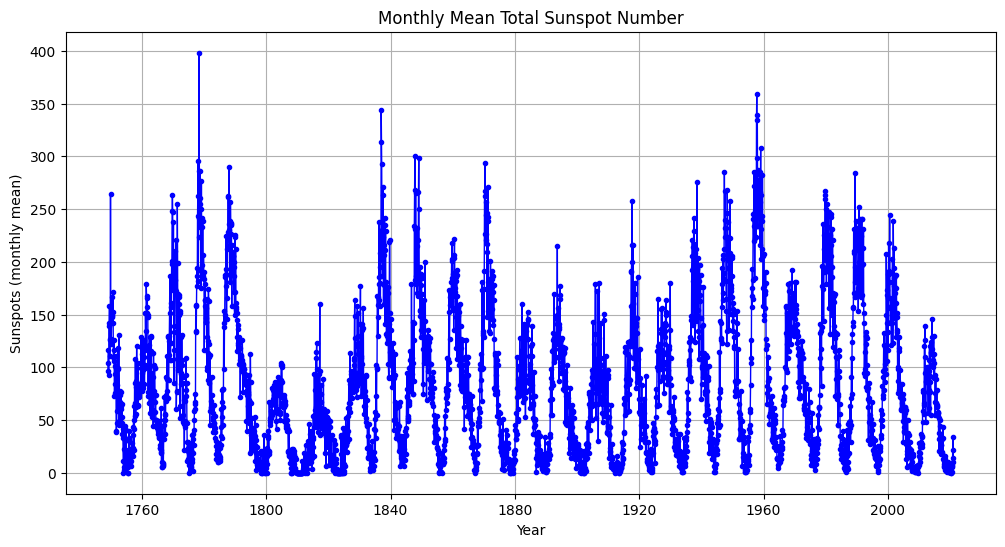

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sunspots'], color='blue', marker='o', linestyle='-', linewidth=1, markersize=3)
plt.title('Monthly Mean Total Sunspot Number')
plt.xlabel('Year')
plt.ylabel('Sunspots (monthly mean)')
plt.grid(True)
plt.show()

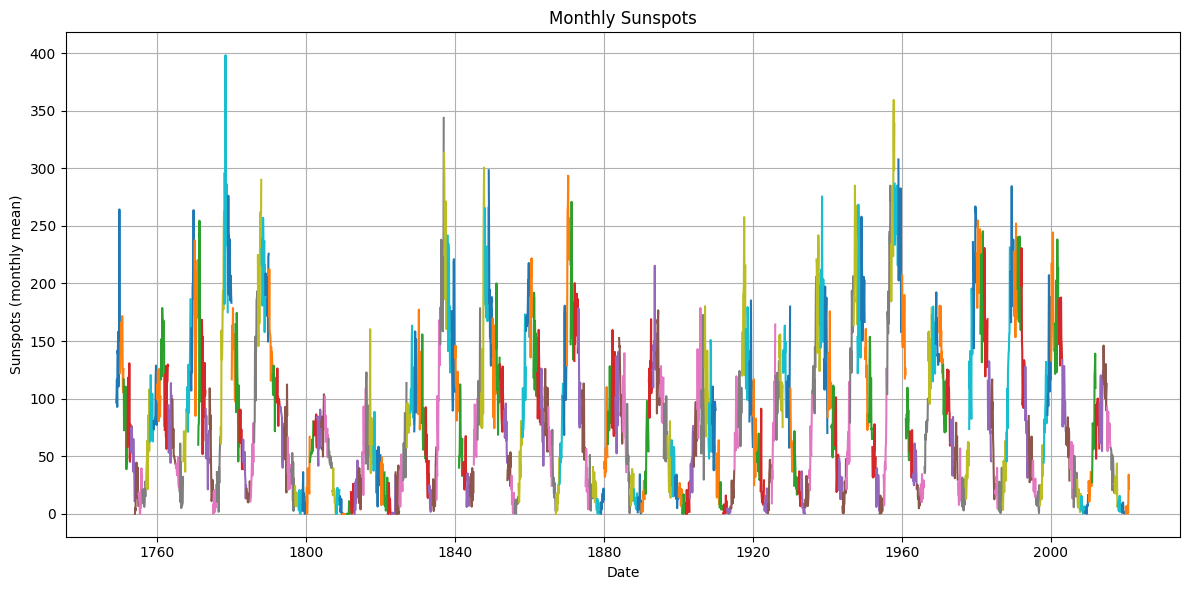

In [21]:
plt.figure(figsize=(12,6))
for year in years:
    year_data = df[df.index.year == year]
    plt.plot(year_data.index, year_data['Sunspots'], label=str(year))
plt.title('Monthly Sunspots')
plt.xlabel('Date')
plt.ylabel('Sunspots (monthly mean)')

#plt.legend(ncol=3, fontsize='small', bbox_to_anchor=(1.01, 1), loc='upper left') #Quitar el comentario si se quiere ver cada etiqueta (Son muchas)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4005339927.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


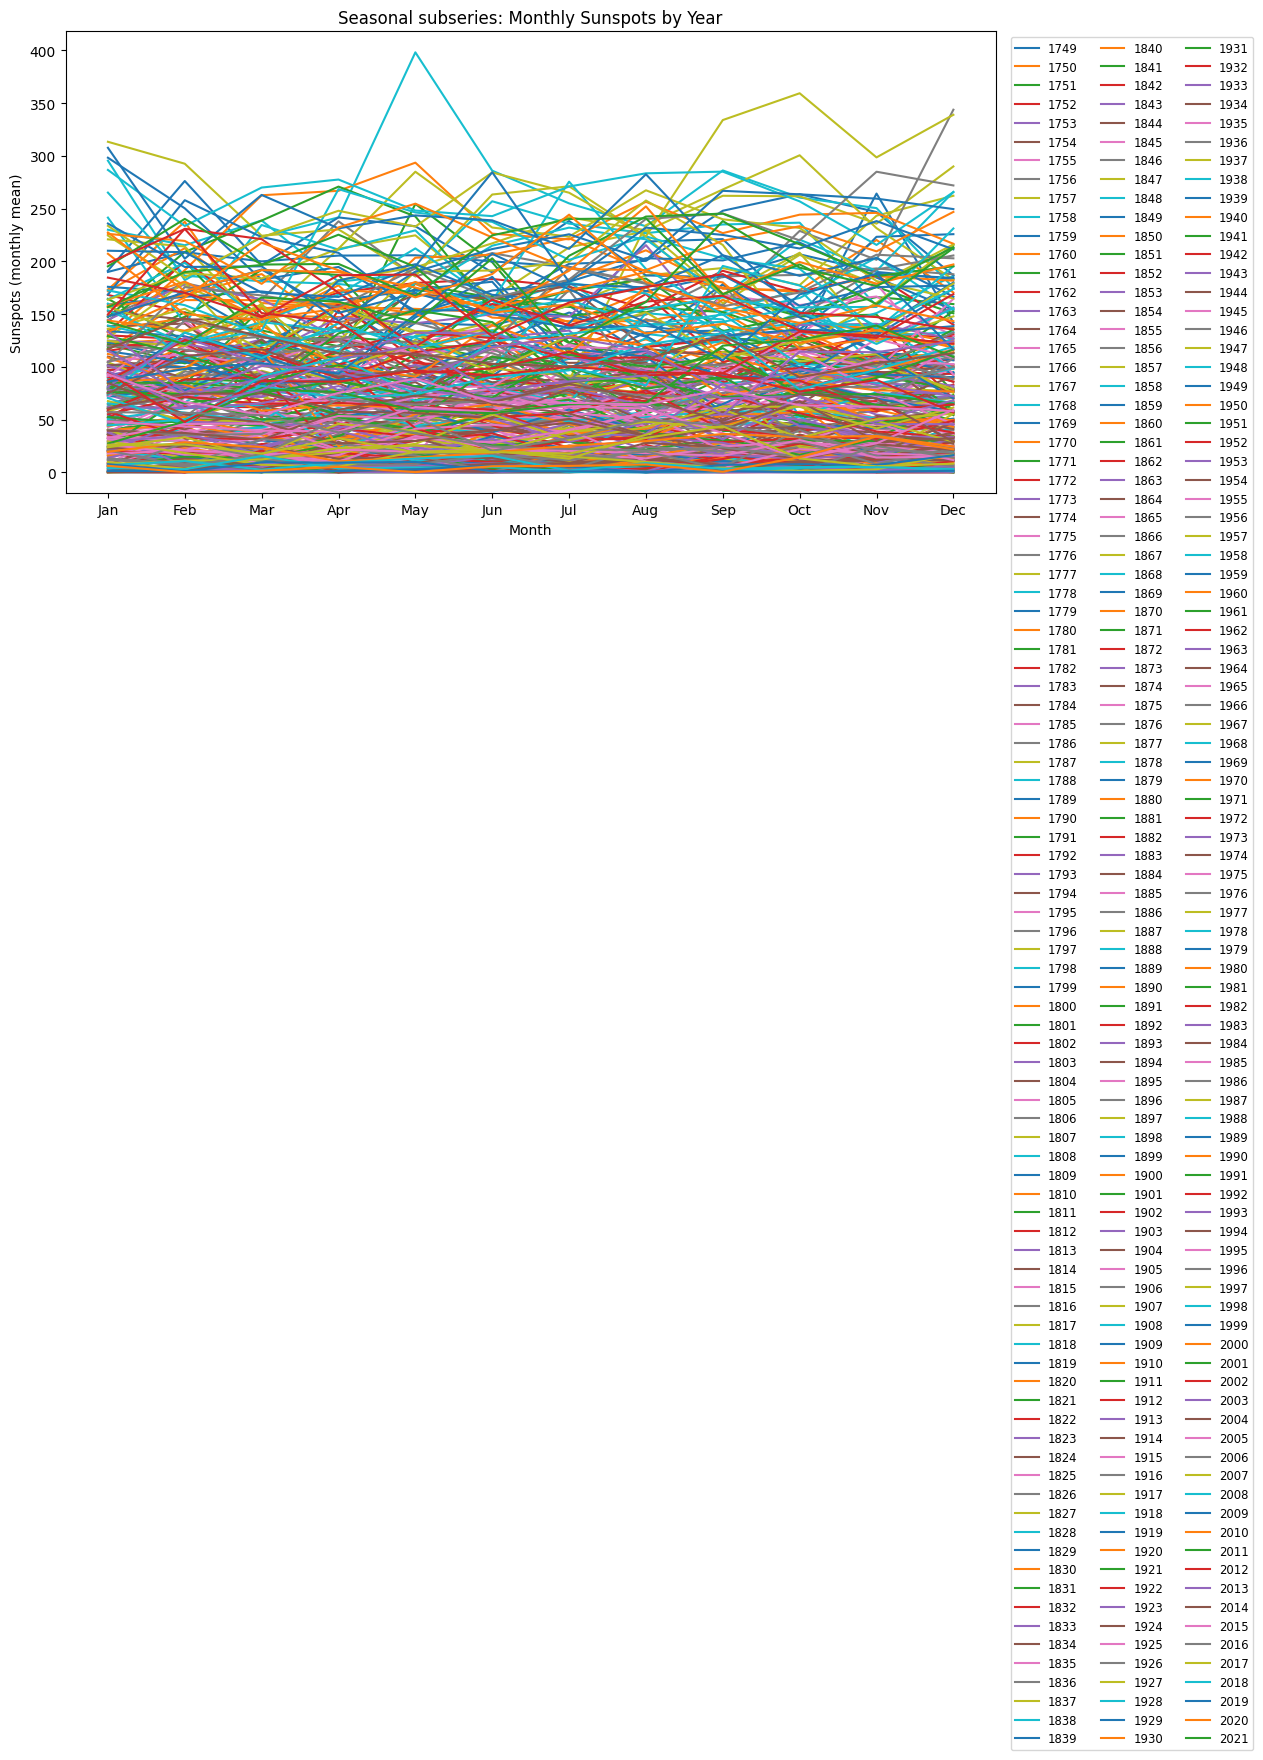

In [26]:
df2 = df.copy()
df2['Year'] = df2.index.year
df2['Month'] = df2.index.month

table = pd.pivot_table(df2, values='Sunspots', index='Month', columns='Year', aggfunc='mean')

fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Sunspots (monthly mean)')
ax.set_title('Seasonal subseries: Monthly Sunspots by Year')
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(ncol=3, fontsize='small', bbox_to_anchor=(1.01, 1), loc='upper left') #Mismo caso anterior
plt.tight_layout()
plt.show()

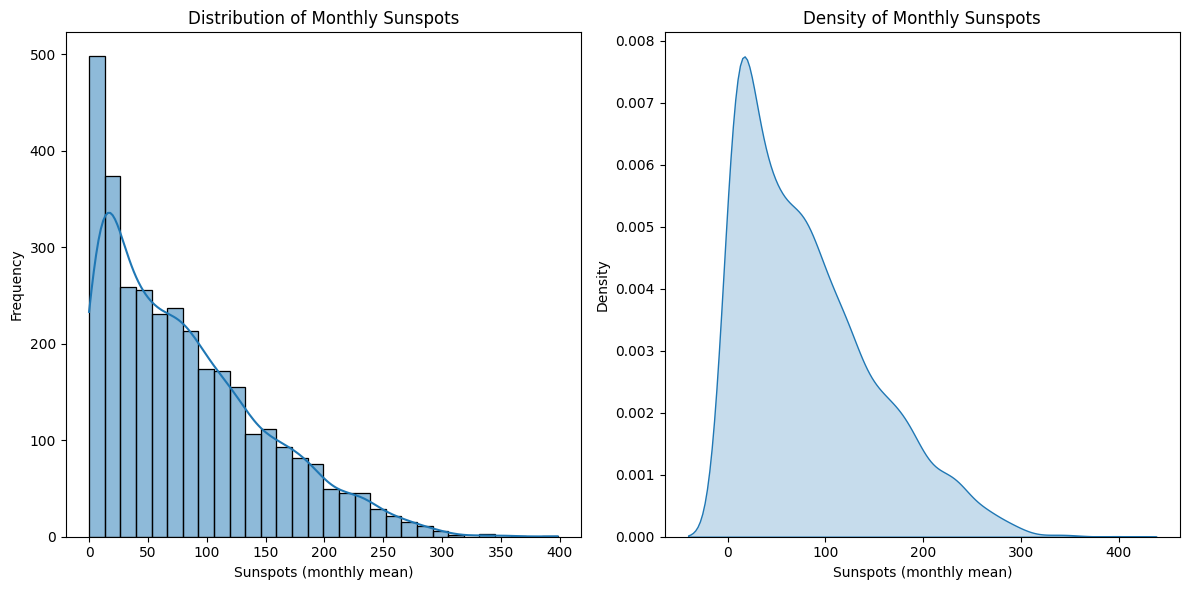

In [29]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df['Sunspots'].dropna(), bins=30, kde=True)
plt.title('Distribution of Monthly Sunspots')
plt.xlabel('Sunspots (monthly mean)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.kdeplot(df['Sunspots'].dropna(), fill=True)
plt.title('Density of Monthly Sunspots')
plt.xlabel('Sunspots (monthly mean)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Exercise : Use the Unemployment in America dataset (https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state) to demonstrate basic concepts of time series

In [31]:
# Extract the Unemp.zip file
with zipfile.ZipFile('UnemploymentAmericaStates.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# List the contents of the current directory to identify the extracted CSV file
!ls

 sample_data    UnemploymentAmericaStates.zip
 Sunspots.csv  'Unemployment in America Per US State.csv'
 Sunspots.zip


In [35]:
unemployment_df = pd.read_csv('Unemployment in America Per US State.csv')
unemployment_df.head(10)

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2
5,37,Los Angeles County,1976,1,"5,273,000","3,381,856",64.1,"3,081,806",58.4,"300,050",8.9
6,8,Colorado,1976,1,"1,832,000","1,230,966",67.2,"1,160,104",63.3,"70,862",5.8
7,9,Connecticut,1976,1,"2,248,000","1,442,847",64.2,"1,301,974",57.9,"140,873",9.8
8,10,Delaware,1976,1,"417,000","261,418",62.7,"240,543",57.7,"20,875",8.0
9,11,District of Columbia,1976,1,"520,000","334,691",64.4,"305,677",58.8,"29,014",8.7


In [36]:
rename_map = {
    'State/Area': 'State',
    "Total Civilian Non-Institutional Population in State/Area": 'Pop_total',
    "Total Civilian Labor Force in State/Area": 'Labor_force',
    "Percent (%) of State/Area's Population": 'Pct_of_pop',
    "Total Employment in State/Area": 'Employment_total',
    "Percent (%) of Labor Force Employed in State/Area": 'Pct_employed',
    "Total Unemployment in State/Area": 'Unemployment_total',
    "Percent (%) of Labor Force Unemployed in State/Area": 'UnemploymentRate'
}

df = unemployment_df.copy()
existing_renames = {k: v for k, v in rename_map.items() if k in df.columns}
df = df.rename(columns=existing_renames)



In [48]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
df = df.set_index('Date')
df.head()

,FIPS Code,State,Year,Month,Pop_total,Labor_force,Pct_of_pop,Employment_total,Pct_employed,Unemployment_total,UnemploymentRate
Date,,,,,,,,,,,
1976-01-01,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1976-01-01,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
1976-01-01,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
1976-01-01,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
1976-01-01,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


In [49]:
#Primero lo haremos solo de Alabama y después de la nación
df['UnemploymentRate'] = pd.to_numeric(df['UnemploymentRate'])
alabama_unemployment_df = df[df['State'] == 'Alabama']
alabama_unemployment_df.head()

,FIPS Code,State,Year,Month,Pop_total,Labor_force,Pct_of_pop,Employment_total,Pct_employed,Unemployment_total,UnemploymentRate
Date,,,,,,,,,,,
1976-01-01,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1976-02-01,1,Alabama,1976,2,"2,610,000","1,483,950",56.9,"1,385,675",53.1,"98,275",6.6
1976-03-01,1,Alabama,1976,3,"2,615,000","1,484,241",56.8,"1,386,793",53.0,"97,448",6.6
1976-04-01,1,Alabama,1976,4,"2,620,000","1,487,233",56.8,"1,390,787",53.1,"96,446",6.5
1976-05-01,1,Alabama,1976,5,"2,626,000","1,491,392",56.8,"1,395,320",53.1,"96,072",6.4


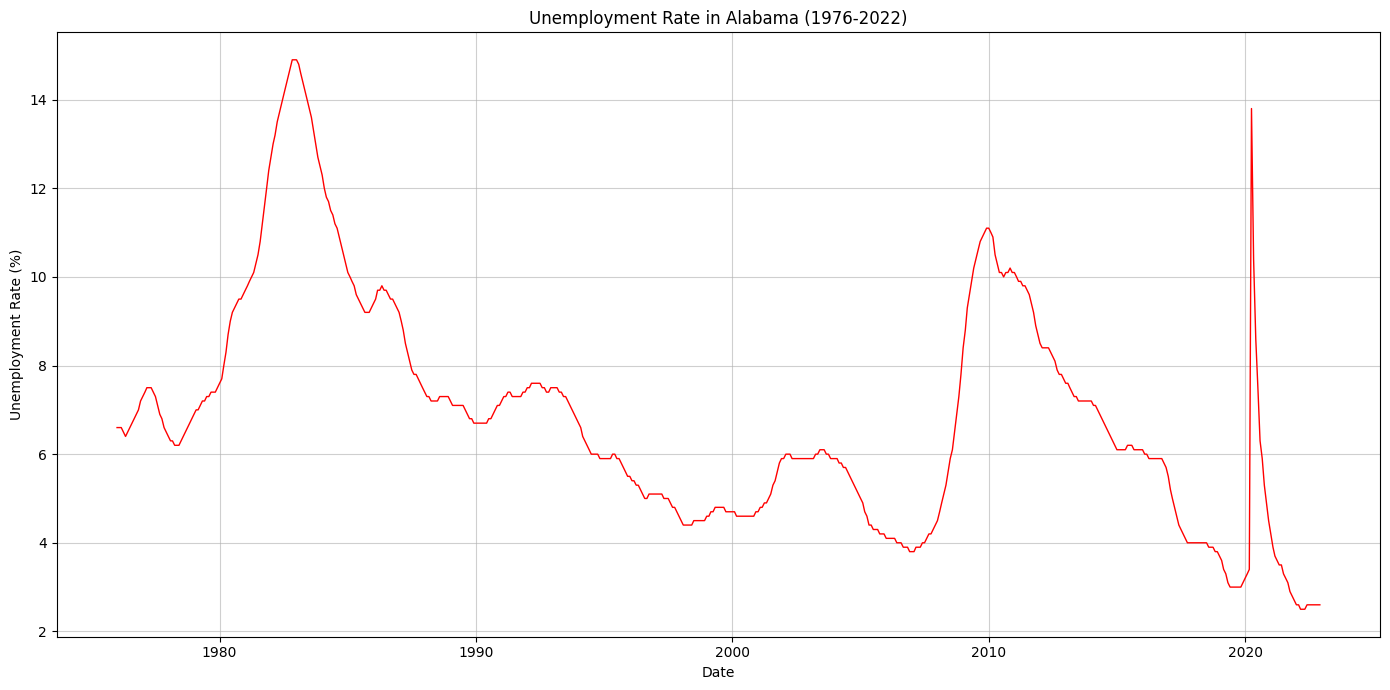

In [50]:
plt.figure(figsize=(14, 7))
plt.plot(alabama_unemployment_df.index, alabama_unemployment_df['UnemploymentRate'], color='red', linestyle='-', linewidth=1)
plt.title('Unemployment Rate in Alabama (1976-2022)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1574471691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alabama_unemployment_df['Year'] = alabama_unemployment_df.index.year
/tmp/ipython-input-1574471691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alabama_unemployment_df['Month'] = alabama_unemployment_df.index.month


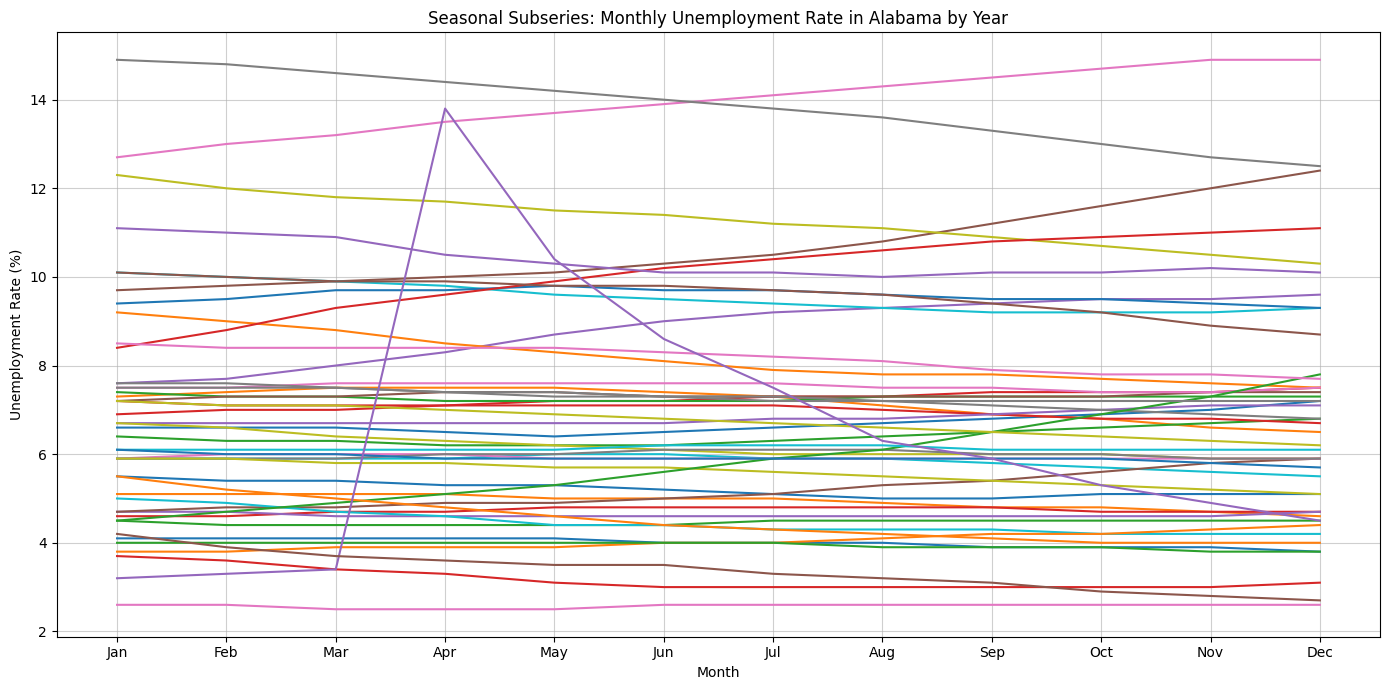

In [54]:
alabama_unemployment_df['Year'] = alabama_unemployment_df.index.year
alabama_unemployment_df['Month'] = alabama_unemployment_df.index.month

table_unemployment = pd.pivot_table(alabama_unemployment_df, values='UnemploymentRate', index='Month', columns='Year', aggfunc='mean')

fig, ax = plt.subplots(figsize=(14, 7))
table_unemployment.plot(ax=ax, legend=False)
ax.set_xlabel('Month')
ax.set_ylabel('Unemployment Rate (%)')
ax.set_title('Seasonal Subseries: Monthly Unemployment Rate in Alabama by Year')
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left') #Descomentar y poner true en legend si se quieren ver los años
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

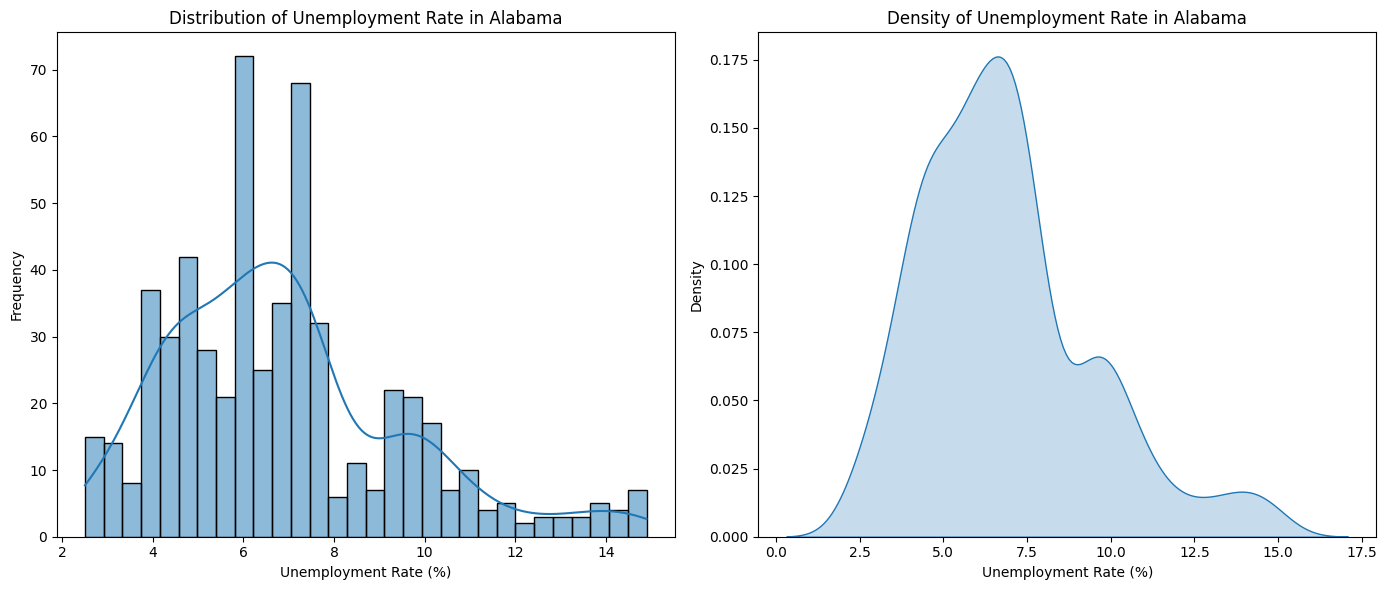

In [55]:
alabama_unemployment_df_copy = alabama_unemployment_df.copy()
alabama_unemployment_df_copy['Year'] = alabama_unemployment_df_copy.index.year
alabama_unemployment_df_copy['Month'] = alabama_unemployment_df_copy.index.month

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(alabama_unemployment_df_copy['UnemploymentRate'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rate in Alabama')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(alabama_unemployment_df_copy['UnemploymentRate'], fill=True)
plt.title('Density of Unemployment Rate in Alabama')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [56]:
#Ahora sí lo haremos nacional

national_unemployment_rate = df.groupby('Date')['UnemploymentRate'].mean()
national_unemployment_rate.head()

,UnemploymentRate
Date,
1976-01-01,7.281132
1976-02-01,7.284906
1976-03-01,7.252830
1976-04-01,7.196226
1976-05-01,7.120755


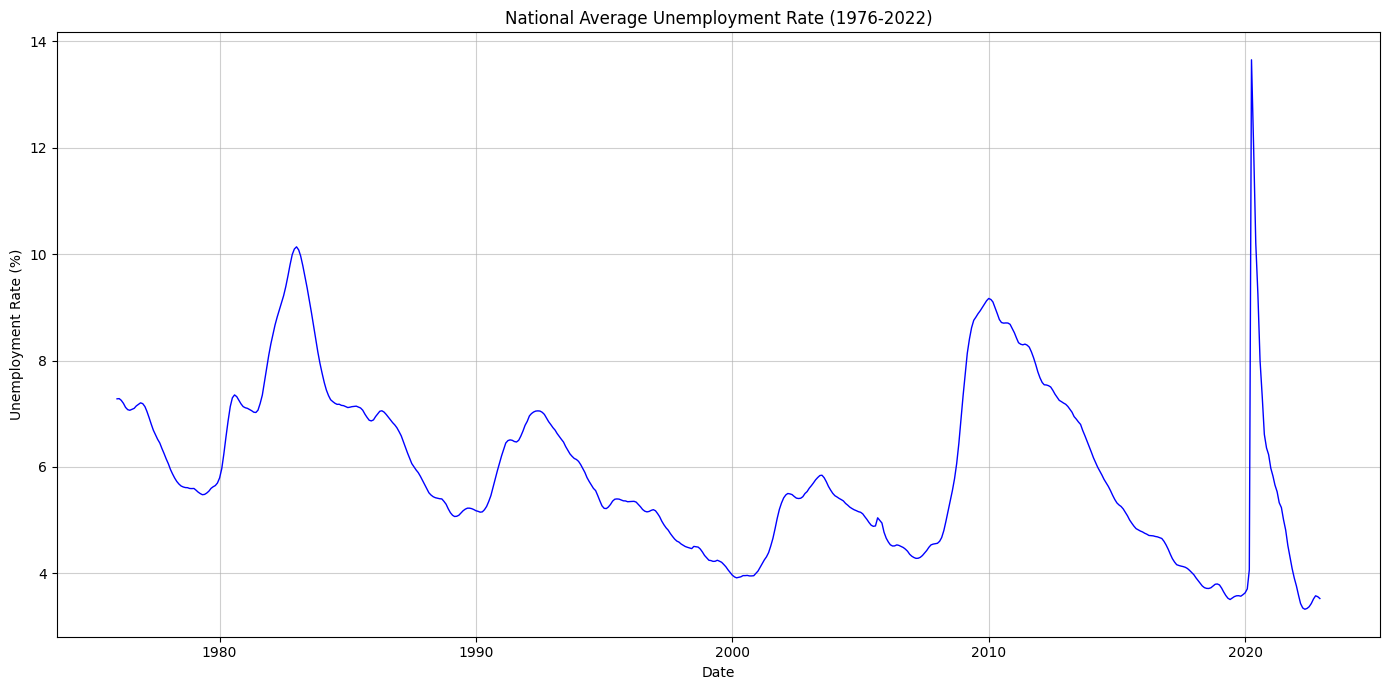

In [57]:
plt.figure(figsize=(14, 7))
plt.plot(national_unemployment_rate.index, national_unemployment_rate.values, color='blue', linestyle='-', linewidth=1)
plt.title('National Average Unemployment Rate (1976-2022)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

In [58]:
national_unemployment_df = national_unemployment_rate.reset_index()
national_unemployment_df['Year'] = national_unemployment_df['Date'].dt.year
national_unemployment_df['Month'] = national_unemployment_df['Date'].dt.month
national_unemployment_df.head()


,Date,UnemploymentRate,Year,Month
0,1976-01-01,7.281132,1976,1
1,1976-02-01,7.284906,1976,2
2,1976-03-01,7.252830,1976,3
3,1976-04-01,7.196226,1976,4
4,1976-05-01,7.120755,1976,5


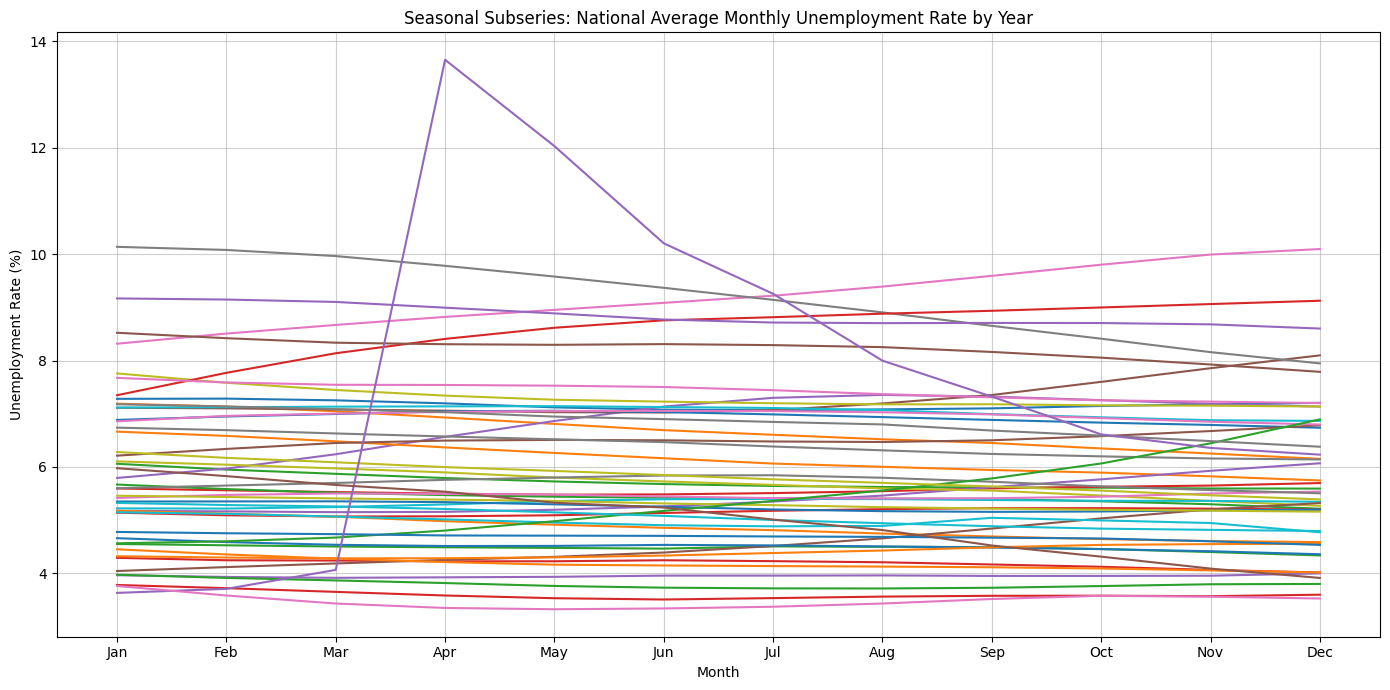

In [60]:
table_national_unemployment = pd.pivot_table(national_unemployment_df, values='UnemploymentRate', index='Month', columns='Year', aggfunc='mean')

fig, ax = plt.subplots(figsize=(14, 7))
table_national_unemployment.plot(ax=ax, legend=False)
ax.set_xlabel('Month')
ax.set_ylabel('Unemployment Rate (%)')
ax.set_title('Seasonal Subseries: National Average Monthly Unemployment Rate by Year')
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

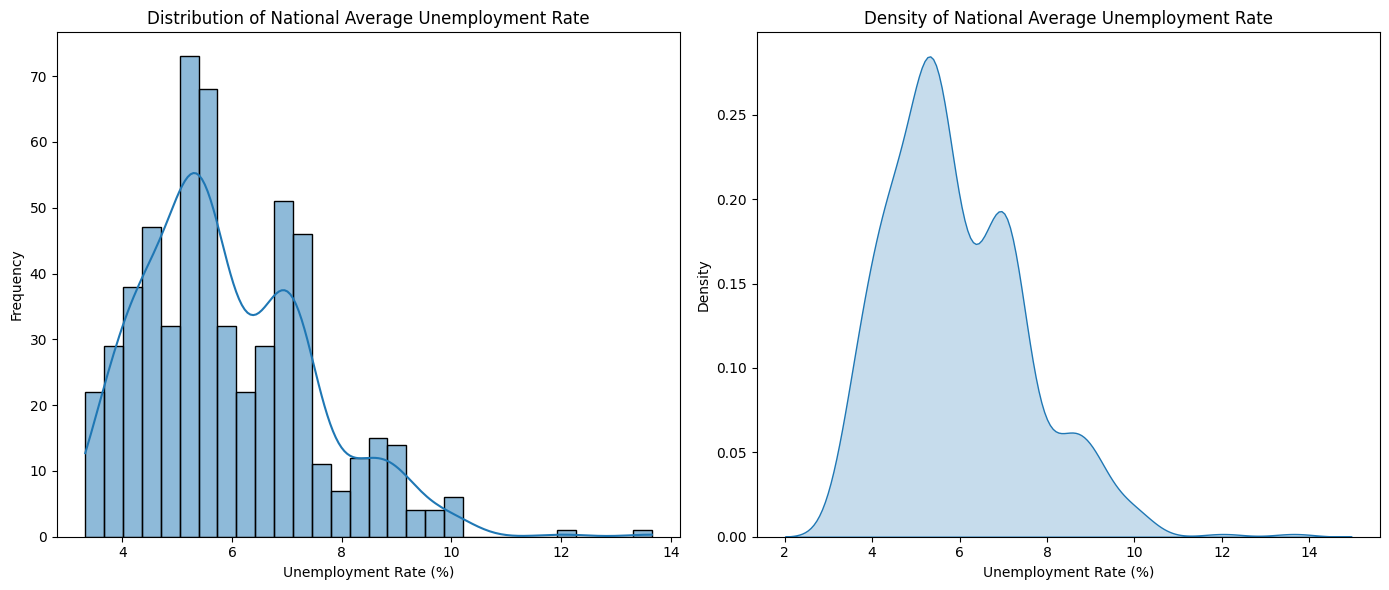

In [61]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(national_unemployment_df['UnemploymentRate'], bins=30, kde=True)
plt.title('Distribution of National Average Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(national_unemployment_df['UnemploymentRate'], fill=True)
plt.title('Density of National Average Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Continuación time series

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10,4)

In [ ]:
def plot_series(s, title):
  s.plot()
  plt.title(title)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()

In [ ]:
def adf_test(x):
  res = adfuller(x, autolag="AIC")
  keys = ['test_stat', 'pvalue', 'lags', 'nobs', 'crit_values', 'icbest']
  return dict(zip(keys), [res[0],res[1],res[2],res[3],res[4],res[5]])

In [ ]:
def kpss_test(x, regression='c', nlags="auto"):
  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
  return {"test_stat": stat, 'pvalue': pval, 'lags': lags, 'crit_values': crit, "regression": regression}

In [ ]:
def print_test(x, name="series"):
  print(f"Test {name}")
  a = adf_test(x) # Call adf_test to get the dictionary
  print(f"ADF Statistic: {a['test_stat']:.3f} p={a['pvalue']}")
  try:
    k = kpss_test(x)
    print(f"KPSS: stat={k['test_stat']:.3f} p={k['pvalue']}")
  except:
    print("KPSS test failed")

In [ ]:
def rolling_mean_var(s, window=24, title="Rolling Mean & Variance"):
  rolling_mean = s.rolling(window=window).mean()
  rolling_var = s.rolling(window=window).var()
  fig, ax = plt.subplots(2,1, figsize=(10,6))
  ax[0].plot(s, label="Original")
  ax[0].plot(rolling_mean, label="Rolling Mean")
  ax[0].legend()
  ax[0].set_title(title + "- mean")
  ax[1].plot(rolling_var, label="Rolling Variance")
  ax[1].legend()
  ax[1].set_title(title + "- variance")
  plt.show()

In [ ]:
n = 240 #Months
t = np.arange(n)

#Stationary: white noise
white_noise = pd.Series(np.random.normal(0,1,n))

#Trend   Non Stationary
trend = .02 * t
trended = pd.Series(trend + np.random.normal(0,1,n))

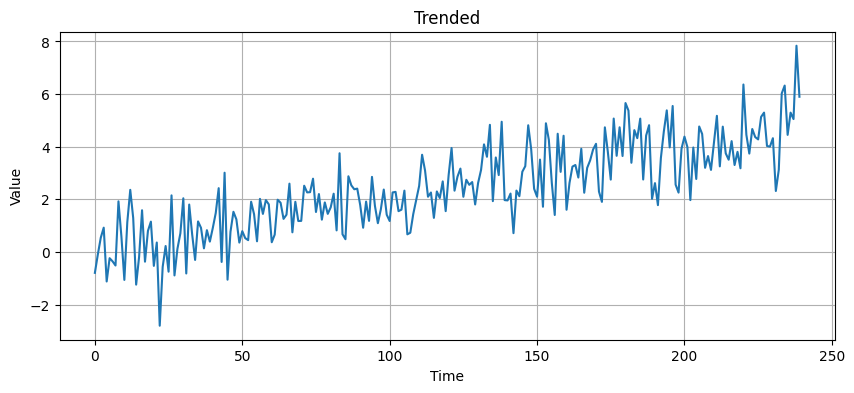

Test Trended


TypeError: dict expected at most 1 argument, got 2

In [ ]:
plot_series(trended, "Trended")
print_test(trended, "Trended")
rolling_mean_var(trended, window=24, title="Trended")

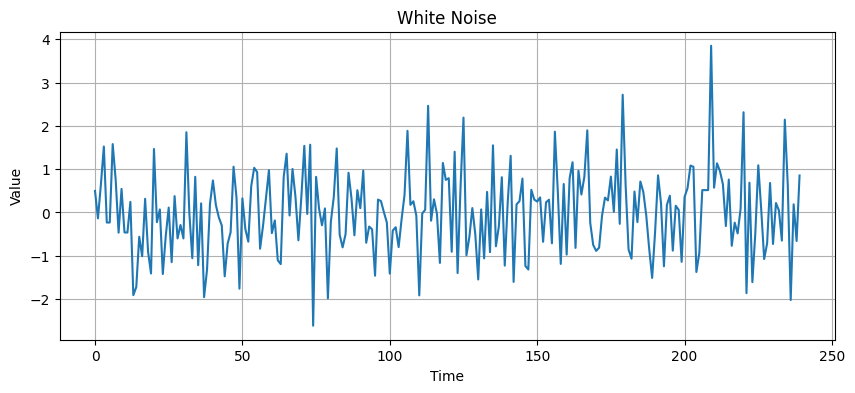

Test White Noise


TypeError: dict expected at most 1 argument, got 2

In [ ]:
plot_series(white_noise, "White Noise")
print_test(white_noise, "White Noise")
rolling_mean_var(white_noise, window=24, title="White Noise")

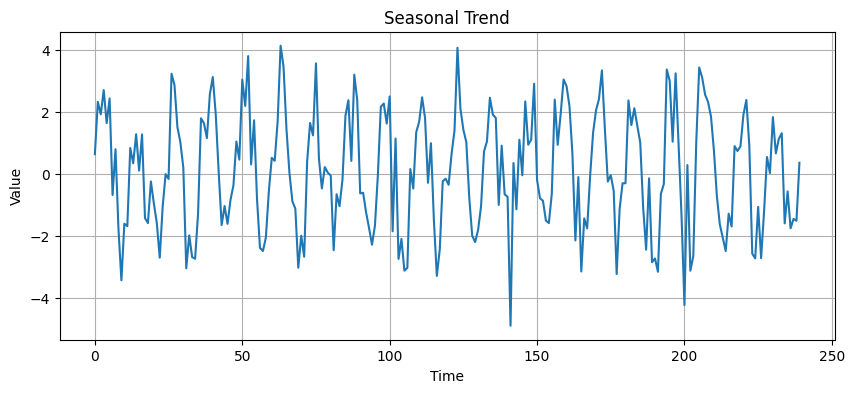

Test Seasonal Trend


TypeError: dict expected at most 1 argument, got 2

In [ ]:
#Seasonal + trend
seasonal = 2 * np.sin(2*np.pi*t/12)
trend= 0.000000002 * t
season_trend = pd.Series(trend+seasonal+np.random.normal(0,1,n))
plot_series(season_trend, "Seasonal Trend")
print_test(season_trend, "Seasonal Trend")
print_test(season_trend,window=24, title="Seasonal Trend")

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url,parse_dates=['Month'],index_col='Month')
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
df.rename(columns={'Passengers':'y'}, inplace=True)
df.head()

,y
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


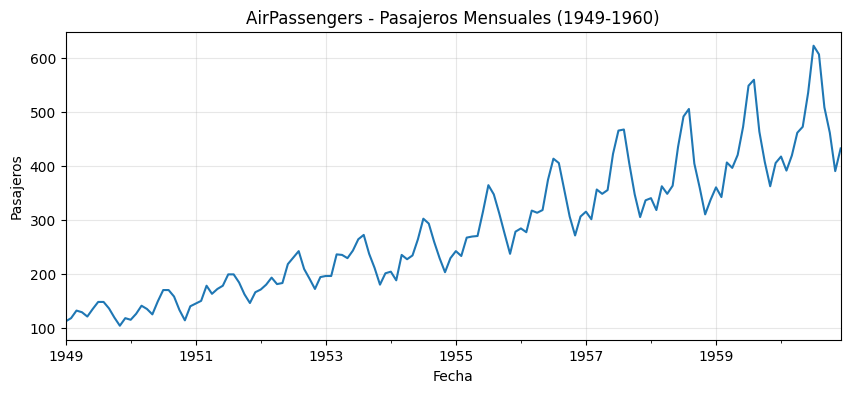

In [ ]:
ax = df['y'].plot()
ax.set_title('AirPassengers - Pasajeros Mensuales (1949-1960)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Pasajeros')
ax.grid(True,alpha=.3)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

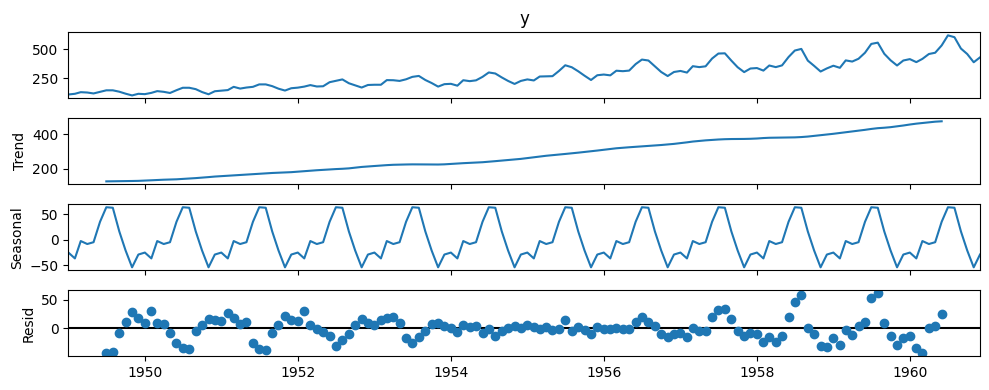

In [ ]:
decomp = seasonal_decompose(df['y'], model="additive", period=12)
decomp.plot()
plt.show()